# Imports

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Reading Data

In [2]:
data_train=pd.read_csv('data/aug_train.csv')
data_test=pd.read_csv('data/aug_test.csv')

# Dataset Info

## Train Data

In [3]:
data_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
data_train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

<Axes: xlabel='target', ylabel='count'>

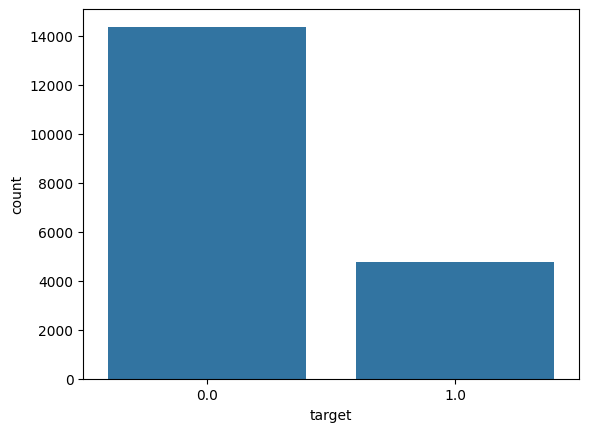

In [6]:
sns.countplot(x='target',data=data_train)

## Test Data

In [7]:
data_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [8]:
data_test.describe()

,enrollee_id,city_development_index,training_hours
count,2129.000000,2129.000000,2129.000000
mean,16861.614843,0.824984,64.983091
std,9576.846029,0.125074,60.238660
min,3.000000,0.448000,1.000000
25%,8562.000000,0.698000,23.000000
50%,16816.000000,0.903000,47.000000
75%,25129.000000,0.920000,86.000000
max,33353.000000,0.949000,334.000000


In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


# Cleaning Data

In [10]:
data_train['company_size'].value_counts()

company_size
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: count, dtype: int64

In [11]:
data_train['company_size'] = data_train['company_size'].replace('10/49','10-49')

## Finding the missing values in train and test dataset

In [12]:
def count_percent(data):
  df_cols = pd.DataFrame({'Count Missing': data.isnull().sum(),
                        'Percent Missing': data.isnull().sum()*100/data.shape[0]})
  return df_cols

In [13]:
count_percent(data_train)

,Count Missing,Percent Missing
enrollee_id,0,0.000000
city,0,0.000000
city_development_index,0,0.000000
gender,4508,23.530640
relevent_experience,0,0.000000
enrolled_university,386,2.014824
education_level,460,2.401086
major_discipline,2813,14.683161
experience,65,0.339284
company_size,5938,30.994885


In [14]:
count_percent(data_test)


,Count Missing,Percent Missing
enrollee_id,0,0.000000
city,0,0.000000
city_development_index,0,0.000000
gender,508,23.860968
relevent_experience,0,0.000000
enrolled_university,31,1.456083
education_level,52,2.442461
major_discipline,312,14.654767
experience,5,0.234852
company_size,622,29.215594


`We will impute the missing values later with an Iterative Imputer`

In [15]:
data_train.drop(['enrollee_id'],axis=1,inplace=True)
data_test.drop(['enrollee_id'],axis=1,inplace=True)


## Label Encoding

In [16]:
columns_to_encode = [
    'gender', 
    'relevent_experience',
    'enrolled_university', 
    'education_level', 
    'major_discipline',
    'experience', 
    'company_size', 
    'company_type', 
    'last_new_job',
    'city'
    ]
label_encoder = LabelEncoder()

In [17]:
data_train_encoded = data_train[columns_to_encode].astype("str").apply(
                label_encoder.fit_transform)
data_train_encoded.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city
0,1,0,3,0,5,21,8,6,0,5
1,1,1,3,0,5,6,4,5,4,77
2,3,1,0,0,5,15,8,6,6,64
3,3,1,2,0,1,20,8,5,6,14
4,1,0,3,2,5,21,4,1,3,50


In [18]:
data_train_encoded = data_train_encoded.where(
                ~data_train[columns_to_encode].isna(), 
                data_train[columns_to_encode])
data_train_encoded.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city
0,1,0,3,0,5,21,NaN,NaN,0,5
1,1,1,3,0,5,6,4,5,4,77
2,NaN,1,0,0,5,15,NaN,NaN,6,64
3,NaN,1,NaN,0,1,20,NaN,5,6,14
4,1,0,3,2,5,21,4,1,3,50


In [20]:
data_train_not_encoded=data_train[['city_development_index', 'training_hours', 'target']]
data_train_not_encoded.head()

,city_development_index,training_hours,target
0,0.920,36,1.0
1,0.776,47,0.0
2,0.624,83,0.0
3,0.789,52,1.0
4,0.767,8,0.0


In [21]:
data_train_cleaned = data_train_encoded.join(data_train_not_encoded)
data_train_cleaned.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city,city_development_index,training_hours,target
0,1,0,3,0,5,21,NaN,NaN,0,5,0.920,36,1.0
1,1,1,3,0,5,6,4,5,4,77,0.776,47,0.0
2,NaN,1,0,0,5,15,NaN,NaN,6,64,0.624,83,0.0
3,NaN,1,NaN,0,1,20,NaN,5,6,14,0.789,52,1.0
4,1,0,3,2,5,21,4,1,3,50,0.767,8,0.0


In [22]:
data_train_X=data_train_cleaned.drop('target', axis=1)
data_train_y=data_train_cleaned['target']

In [23]:
data_train_X

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city,city_development_index,training_hours
0,1,0,3,0,5,21,NaN,NaN,0,5,0.920,36
1,1,1,3,0,5,6,4,5,4,77,0.776,47
2,NaN,1,0,0,5,15,NaN,NaN,6,64,0.624,83
3,NaN,1,NaN,0,1,20,NaN,5,6,14,0.789,52
4,1,0,3,2,5,21,4,1,3,50,0.767,8
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,1,1,3,0,2,5,NaN,NaN,0,55,0.878,42
19154,1,0,3,0,5,5,NaN,NaN,3,5,0.920,52
19155,1,0,3,0,5,21,4,5,3,5,0.920,44
19156,1,0,3,1,NaN,20,5,5,1,94,0.802,97


In [24]:
data_train_y

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
19153    1.0
19154    1.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 19158, dtype: float64

# MICE/Iterative Imputer

In [29]:
lr = LinearRegression()
mice_imputer = IterativeImputer(random_state=42, estimator=lr, 
                                max_iter=10, n_nearest_features=2, imputation_order = 'roman')
data_imputed = mice_imputer.fit_transform(data_train_cleaned)

c:\Users\1999y\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [30]:
data_imputed = pd.DataFrame(data_imputed, columns=data_train_cleaned.columns)
data_imputed

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city,city_development_index,training_hours,target
0,1.000000,0.0,3.000000,0.0,5.000000,21.0,3.038666,4.087266,0.0,5.0,0.920,36.0,1.0
1,1.000000,1.0,3.000000,0.0,5.000000,6.0,4.000000,5.000000,4.0,77.0,0.776,47.0,0.0
2,0.937383,1.0,0.000000,0.0,5.000000,15.0,3.144270,4.753417,6.0,64.0,0.624,83.0,0.0
3,0.854839,1.0,1.991425,0.0,1.000000,20.0,3.156153,5.000000,6.0,14.0,0.789,52.0,1.0
4,1.000000,0.0,3.000000,2.0,5.000000,21.0,4.000000,1.000000,3.0,50.0,0.767,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,1.000000,1.0,3.000000,0.0,2.000000,5.0,3.035641,4.087266,0.0,55.0,0.878,42.0,1.0
19154,1.000000,0.0,3.000000,0.0,5.000000,5.0,3.102127,4.420342,3.0,5.0,0.920,52.0,1.0
19155,1.000000,0.0,3.000000,0.0,5.000000,21.0,4.000000,5.000000,3.0,5.0,0.920,44.0,0.0
19156,1.000000,0.0,3.000000,1.0,4.824825,20.0,5.000000,5.000000,1.0,94.0,0.802,97.0,0.0


In [ ]:
count_percent(data_imputed)

,Count Missing,Percent Missing
gender,0,0.0
relevent_experience,0,0.0
enrolled_university,0,0.0
education_level,0,0.0
major_discipline,0,0.0
experience,0,0.0
company_size,0,0.0
company_type,0,0.0
last_new_job,0,0.0
city,0,0.0


In [34]:
data_imputed["target"].value_counts(normalize=True)

target
0.0    0.750652
1.0    0.249348
Name: proportion, dtype: float64

## Data is imbalanced, Hence we balance the data using SMOTE

In [35]:
y_true = data_imputed["target"]

In [ ]:
smote = SMOTE(random_state=101) #,sampling_strategy='minority', k_neighbors=5)
X_train_smote, y_train_smote = smote.fit_resample(data_imputed.drop('target',axis=1), data_imputed.target)

X_train, X_eval, y_train, y_eval = train_test_split(X_train_smote, y_train_smote, test_size=0.30, random_state=101)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_eval)

In [ ]:
X_train

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
list1=[]